# Lebedev tests

Calculate predictions from Lebedev functions.

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline



In [24]:
# Plotting preparation
import sys
sys.path.append('../')
from plot_configuration import *
np.set_printoptions(precision=3,suppress=True) 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset
plt.close('all')

def sci_not(num,dec):
    if num>0:
        exp = int(np.log10(num)+100)-100
        sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
    else:
        sci = '$0$'
    return sci

Finished configuring the plots.


In [3]:
from LebedevHelper import *
# pi2 = np.pi*2
# sigdpp= 1.129E-4

# def func_g2(g):
#     return g/2
# #     return 1-np.sqrt(1-g+g**2*0.5)


# def lebfac(g,dq):
#     g2 = func_g2(g)
# #     return pi2**2*(1-g2)**2 / (pi2**2*(1-g2) + g2**2/(dq)**2)
#     return pi2**2*(1-g2)**2*(dq)**2 / (pi2**2*(1-g2)*(dq)**2  + g2**2)
    

# def anal_DJx(J,g2,Qp,sigdpp= 1.129E-4):
#     dq = Qp*sigdpp*np.sqrt(2*J)
#     a = pi2**2*(1-g2)**2*dq**2
#     b = pi2**2*(1-g2)*dq**2
#     c = g2**2
#     return a/b*(1-1/np.sqrt(b/c+1))

# def anal_DJx2(J,g2,Qp,sigdpp= 1.129E-4):
#     return (1-g2)*(1-1/np.sqrt(1+2*pi2**2*(1-g2)/g2**2*Qp**2*sigdpp**2*J))

# def dist(d,sigdpp=1.129e-4):
#     return  1/(np.sqrt(2*np.pi)*sigdpp) * np.exp(-d**2/sigdpp**2*0.5)

# def intQx(Jy,Jx,Qx0,a,b,exp):
#     return Qx(Qx0,a,b,Jx,Jy)**(exp)*np.exp(-Jx-Jy)

# def dQxOctu(Jx,Jy,a,b):
#     return a*(Jx-1) + b*(Jy-1)

# def octu_leb(Jx,Jy,a,b,g):
#     dq = dQxOctu(Jx,Jy,a,b)
#     return lebfac(g,dq)

# def int_octu_leb(Jx,Jy,a,b,g):
#     return octu_leb(Jx,Jy,a,b,g)*np.exp(-Jx-Jy)

In [4]:
a = 1e-3
b = -0.7*a
g = 1e-2 *40
red = integrate.nquad(int_octu_leb, [[0,np.inf], [0,np.inf]],args=(a,b,g))[0]
print(red)
print(red * 1e-8/2*1e6*1 * 11245.5*3600/1e6)

0.000934271961096182
0.00018911439609312804


[4.93120565e-05 1.83740457e-04 6.83872995e-04 2.53496382e-03
 9.25972572e-03 3.22296529e-02 9.87055341e-02 2.39211825e-01
 4.38106570e-01 6.33183044e-01 7.79823066e-01 8.73152925e-01
 9.27143581e-01 9.56787768e-01 9.72617587e-01]


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


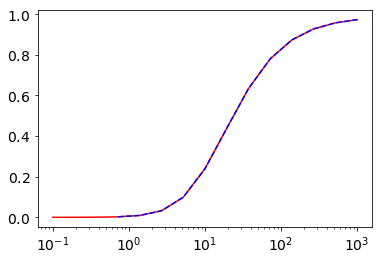

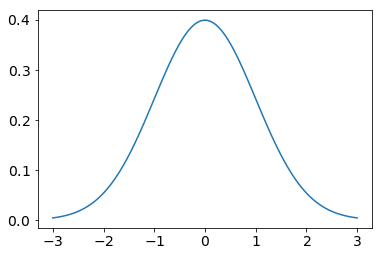

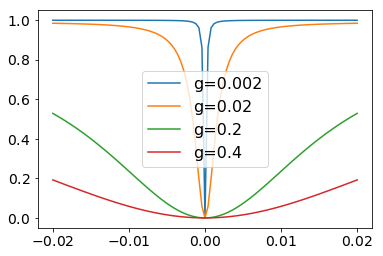

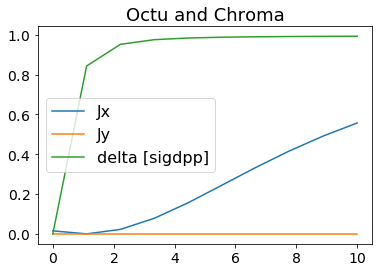

In [5]:
##################################################################
######### Temporary to look for error in my derivation ###########
##################################################################
PI = np.pi
sep = 1
g = 0.02
g2 = g/2


# Js = np.linspace(0.001,10,100)
# dq = Qp*sigdpp*np.sqrt(2*Js)
# dJ =0.5*sep**2

def rel_int2b(A,r=1):  # gaussian distriubiotn
    A = A*r
    fac4 = g2/(np.sqrt(2-2*g2)*A)
    return 1-g2 - (np.exp(fac4**2) * np.sqrt(1-g2)*g2*np.sqrt(PI*0.5) * spec.erfc(fac4)) / (A)


def integrand_chroma(d,g,Qp):
    return dist(d) * lebfac(g,d*Qp)

N=15
f_num = np.zeros(N)
f_anal= np.zeros(N)
Qps =  np.logspace(-1,3,N )
for i,Qp in enumerate(Qps ):
    f_num[i] = integrate.quad(integrand_chroma,-10*sigdpp,10*sigdpp,args=(g,Qp))[0]
#     f_num[i] = integrate.quad(dist,-np.inf,np.inf,args=())[0]
    f_anal[i]=rel_int2b(2*np.pi*sigdpp*Qp)
    
plt.figure()
plt.semilogx(Qps,f_num,'r')
plt.semilogx(Qps,f_anal,'b--')
print(f_num)

plt.figure()
x= np.linspace(-3,3,100)
plt.plot(x,dist(x,1))


plt.figure()
dq = 0.02
dqs = np.linspace(-dq,dq,101)

for g in [0.002,0.02,0.2,0.4]:
    plt.plot(dqs,lebfac(g,dqs),label = 'g='+str(g))
plt.legend(loc=0)


############################################
############ Octu and Chroma ###############
############################################
plt.figure()
plt.title('Octu and Chroma')
a = 1e-4
b = 0
g = 0.01
Qp=15
sigdpp=1.129e-4

Jx = np.linspace(0,10,10)
Jy = 0
delta = 0


plt.plot(Jx,octuQp_leb(Jx,1,0,a,b,g,Qp),label='Jx')
plt.plot(Jx,octuQp_leb(1,Jx,0,a,b,g,Qp),label='Jy')
plt.plot(Jx,octuQp_leb(1,1,Jx*sigdpp,a,b,g,Qp),label='delta [sigdpp]')
plt.legend()

For a separation of 1
expect a emittance growth of 0.50
expect an action growth of   0.50
tau1 200.0


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:144: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


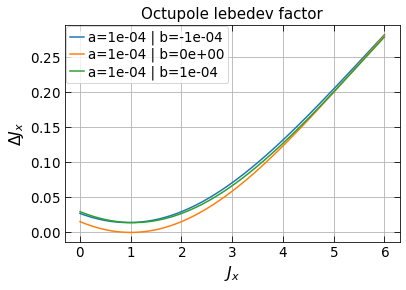

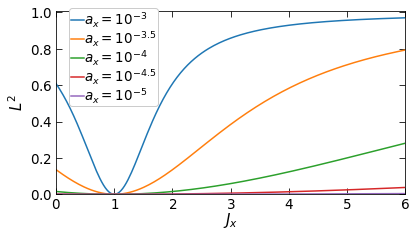

In [26]:
sep = 1
g = 0.02
g2 = func_g2(g)
Qp = 5
sigdpp= 1.129E-4
Js = np.linspace(0.001,10,100)
dq = Qp*sigdpp*np.sqrt(2*Js)
dJ =0.5*sep**2

# print(dq)

if 0:
    plt.figure()
    plt.plot(Js,lebfac(g,dq))

    
    
bool_chroma    = 0
bool_chisquare = 0
bool_octu      = 1

if bool_chroma:
    # Chromaticity
    def integrand(x,g,dqi):
        return lebfac(g,dqi*np.cos(x))/pi2

    def integrand2(x,g,sig):
    #     return lebfac(g,dQdJx*x)*st.chi2.pdf(x,2)
        return lebfac(g,x)*1/np.sqrt(2*np.pi*sig**2)*np.exp(-0.5*x**2/sig**2)

    f1 = np.zeros_like(dq)
    for i,dqi in enumerate(dq):
        f1[i]= integrate.quad(integrand, 0, pi2,args = (g,dqi))[0]
    #     f1[i]= integrate.quad(integrand2, -np.inf, np.inf, args = (g,dqi/3))[0]





    plt.figure()
    # plt.plot(Js,f1*dJ,'r')
    for Qpr in [1,3,6,10,15,30]:
    #     f2 = anal_DJx(Js,g2,Qpr)
        f2 = anal_DJx2(Js,g2,Qpr)
        plt.plot(Js,f2,label=r'$g=%.2f$, $Q^\prime=%d$'%(g,Qpr))
    #     plt.plot(Js,f2,'--',label=r'$g=%.2f$, $Q^\prime=%d$'%(g,Qpr))
    plt.ylim(0,1.2)
    plt.xlabel(r'$J_z$')
    # plt.ylabel(r'$\Delta J_x$',fontsize=16)
    # plt.title('Lebedev factor')
    plt.legend(loc=0,frameon = False,
              columnspacing = 2,labelspacing = 0,ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('03_Plots/DACT_chroma_anal.eps')

    # plt.savefig('DACT_j4_Qp%d'%Qp)
    # plt.figure()
    # f2 = np.cumsum(f)
    # plt.plot(Js,f2)



print('For a separation of %d'%sep)
print('expect a emittance growth of %.2f'%(0.5*sep**2))
print('expect an action growth of   %.2f'%(0.5*sep**2))

#########################################################
#########################################################
if bool_chisquare:
    def chi2_dist(J):
        return st.chi2.pdf(J*2,2)*2
    dist2= chi2_dist(Js)
    plt.figure()
    plt.plot(Js,dist2)
    plt.plot(Js,np.exp(-Js),'r--')
    plt.title('Test of action distribution')
    print(np.sum(dist2)*np.diff(Js)[0])
    print(np.sum(dist2*f2)*np.diff(Js)[0])
    def integrand(J):
        return chi2_dist(J)*anal_DJx(g2,J,Qp)
    print('Integral',integrate.quad(integrand,0,20)[0])




#########################################################
#########################################################
# Octupole
if bool_octu:
    g = 0.01
    G = func_g2(g)
    tau1=2/g
    print('tau1',tau1)
    a = 1e-4
    b = -a
    Jxmax = 6
    Jx = np.linspace(0,Jxmax,200)
    leb1=np.zeros_like(Jx)
    leb2=np.zeros_like(Jx)
    leb3=np.zeros_like(Jx)
    leb4=np.zeros_like(Jx)

    def integrand_octupole(Jy,Jx,aa,bb):
        dq = aa*(Jx-1) + bb*(Jy-1)
        return lebfac(g,dq)*np.exp(-Jy)

    for i,J in enumerate(Jx):
        leb1[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,b))[0]
    #     leb2[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,0))[0]
        dq = a*(J-1) 
        leb2[i] = lebfac(g,dq)
        leb4[i]= integrate.quad(integrand_octupole,0,100,args = (J,a,-b))[0]
    #     leb2[i] = (lebfac(g,dq+b)+lebfac(g,dq-b)   )*0.5
    leb3 = (4*np.pi**2 *(1 - G)**2 *(b**2 + a**2*(1 - Jx)**2) )/G**2

    plt.figure()
    plt.plot(Jx,leb1,label='a=%.0e | b=%.0e'%(a,b))
    plt.plot(Jx,leb2,label='a=%.0e | b=%.0e'%(a,0))
    plt.plot(Jx,leb4,label='a=%.0e | b=%.0e'%(a,-b))
    # plt.plot(Jx,leb3,label='a=%.0e | b=%.0e, g>>ΔQ'%(a,b))
    plt.title('Octupole lebedev factor')
    plt.xlabel(r'$J_x$',fontsize=16)
    plt.ylabel(r'$\Delta J_x$',fontsize=16)
    plt.grid(True)
    plt.legend(loc=0)
    # plt.plot(Jx,(Jx-1)**2/340,'--')



    plt.figure(figsize=(6,3.5))
#     plt.figure()
    for exp in np.linspace(-3,-5,5):
        a=10**exp
        b=0
        if b==-a:
            bstr = '-a'
        elif b==0:
            bstr='0'
        elif b==a:
            bstr='a'
        lab = r'$a=10$^$(%.1f)$ | $b=%s$'%(exp,bstr)
        lab = r'$g=%.2f$, $a_x=$%s'%(g,[sci_not(a,2),'$10^{%s}$'%(['%d'%exp,'%.1f'%exp][exp%1>0])][1])
        lab = r'$a_x=$%s'%([sci_not(a,2),'$10^{%s}$'%(['%d'%exp,'%.1f'%exp][exp%1>0])][1])
        if b>0:
            leb1=np.zeros_like(Jx)
            for i,J in enumerate(Jx):
                leb1[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,b))[0] 
        else: 
            leb1 = LL(g/2,func_dmu(a,Jx,1))
        plt.plot(Jx,leb1**(1),label=lab)

    plt.ylim(0,1.01)
    plt.xlim(0,6)
    # plt.title('Octupole Lebedev factor, g=%.2f'%g,fontsize = 16)
    plt.xlabel(r'$J_x$',labelpad=-1)
    plt.ylabel(r'$\left\langle \Delta J_x(J_{x,0})\right\rangle \,/\, (k^2/2)$',rotation=90)
    plt.ylabel(r'$L^2$')
    # plt.ylabel(r'$\Delta J_x$')
#     plt.grid(True)
    plt.legend(
        loc=(0.038,0.48)    ,
    #     bbox_to_anchor=[0, 1.04], loc='upper left',
              frameon = True,framealpha=1,columnspacing = 2,labelspacing = 0,ncol=1,
                handlelength=1,borderaxespad=0.,borderpad=.1,handletextpad=0)
#     plt.tick_params(axis='x', which='major', pad=0)
    plt.tight_layout()
    plt.savefig('03_Plots/LEB_Octupole_b=%s.pdf'%bstr)#,format='svg')





In [191]:
#########################################
####### octupole and chroma #############
#########################################

N = 13
if 1:
    xvals = np.zeros((3,N))
    lebfacs=np.zeros((3,N))
    for i in range(3):
        aA = 3e-5*np.ones(N)
        bA = -0.7*aA
        gA = 0.01*np.ones(N)
        QpA= 15*np.ones(N) *1
        sigdpp= 1.129E-4  * 0.78
        if i==0:
            QpA[:]=0
            aA = np.logspace(-5,-1,N)
            bA = -0.7*aA
        if i==1:
            aA = np.logspace(-5,-1,N)
            bA = -0.7*aA
        if i==2:
            gA = np.logspace(-5,-1,N)*3

        for j in range(N):
            if QpA[j]!=0:
                lebfacs[i,j] = integrate.nquad(int_octuQp_leb, 
                                [[0,10], [0,10],[-6*sigdpp,6*sigdpp]],
                                args=(aA[j],bA[j],gA[j],QpA[j],sigdpp))[0]
            else:
                lebfacs[i,j] = integrate.nquad(int_octu_leb, 
                                [[0,np.inf], [0,np.inf]],
                                args=(aA[j],bA[j],gA[j]))[0]
            print(i,j,aA[j],bA[j],gA[j],QpA[j],sigdpp, lebfacs[i,j])
        xvals[i,:] = aA/gA
else:
    aA = np.logspace(-5,-1,N)
    bA = -0.7*aA
    gA = 0.01*np.ones(N)
    QpA= 15*np.ones(N) *1
    sigdpp= 1.129E-4 * 0.78
    for j in range(N):
        if QpA[j]!=0:
            val = integrate.nquad(int_octuQp_leb, 
                            [[0,10], [0,10],[-6*sigdpp,6*sigdpp]],
                            args=(aA[j],bA[j],gA[j],QpA[j],sigdpp))[0]
        else:
            val = integrate.nquad(int_octu_leb, 
                            [[0,np.inf], [0,np.inf]],
                            args=(aA[j],bA[j],gA[j]))[0]
        print(i,j,aA[j],bA[j],gA[j],QpA[j],sigdpp, val)


0 0 1e-05 -7e-06 0.01 0.0 8.806200000000001e-05 0.00023259936440358408
0 1 2.1544346900318823e-05 -1.5081042830223175e-05 0.01 0.0 8.806200000000001e-05 0.0010739059815028725
0 2 4.641588833612782e-05 -3.249112183528947e-05 0.01 0.0 8.806200000000001e-05 0.004870068304501136
0 3 0.0001 -7e-05 0.01 0.0 8.806200000000001e-05 0.020691937707827894
0 4 0.00021544346900318823 -0.00015081042830223176 0.01 0.0 8.806200000000001e-05 0.0743699363796286
0 5 0.00046415888336127773 -0.0003249112183528944 0.01 0.0 8.806200000000001e-05 0.20272702371064355
0 6 0.001 -0.0007 0.01 0.0 8.806200000000001e-05 0.4055170864474531
0 7 0.002154434690031882 -0.0015081042830223173 0.01 0.0 8.806200000000001e-05 0.622814033015401
0 8 0.004641588833612777 -0.003249112183528944 0.01 0.0 8.806200000000001e-05 0.791025400719944
0 9 0.01 -0.006999999999999999 0.01 0.0 8.806200000000001e-05 0.892771559797392
0 10 0.021544346900318822 -0.015081042830223174 0.01 0.0 8.806200000000001e-05 0.9459248523557163
0 11 0.046415

/home/sfuruset/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)


0 12 0.1 -0.06999999999999999 0.01 0.0 8.806200000000001e-05 0.9841953307250981
1 0 1e-05 -7e-06 0.01 15.0 8.806200000000001e-05 0.5015859831789815
1 1 2.1544346900318823e-05 -1.5081042830223175e-05 0.01 15.0 8.806200000000001e-05 0.5016339988242775
1 2 4.641588833612782e-05 -3.249112183528947e-05 0.01 15.0 8.806200000000001e-05 0.5018564351093944
1 3 0.0001 -7e-05 0.01 15.0 8.806200000000001e-05 0.5028797224033109
1 4 0.00021544346900318823 -0.00015081042830223176 0.01 15.0 8.806200000000001e-05 0.5074454579663893
1 5 0.00046415888336127773 -0.0003249112183528944 0.01 15.0 8.806200000000001e-05 0.5256253734425447
1 6 0.001 -0.0007 0.01 15.0 8.806200000000001e-05 0.5797583714530439
1 7 0.002154434690031882 -0.0015081042830223173 0.01 15.0 8.806200000000001e-05 0.6817657049570287
1 8 0.004641588833612777 -0.003249112183528944 0.01 15.0 8.806200000000001e-05 0.8004380167707974
1 9 0.01 -0.006999999999999999 0.01 15.0 8.806200000000001e-05 0.8928611908948891


/home/sfuruset/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


1 10 0.021544346900318822 -0.015081042830223174 0.01 15.0 8.806200000000001e-05 0.9457820994268495
1 11 0.046415888336127774 -0.03249112183528944 0.01 15.0 8.806200000000001e-05 0.9717805973533706


KeyboardInterrupt: 

array([  1.00000000e+00,   4.64158883e-01,   2.15443469e-01,
         1.00000000e-01,   4.64158883e-02,   2.15443469e-02,
         1.00000000e-02,   4.64158883e-03,   2.15443469e-03,
         1.00000000e-03,   4.64158883e-04,   2.15443469e-04,
         1.00000000e-04])
array([ 0.99763343,  0.99501433,  0.9894011 ,  0.9774431 ,  0.95229506,
        0.90083909,  0.80143977,  0.63063561,  0.39599697,  0.17552094,
        0.05264123,  0.0118498 ,  0.00219637])
0.02


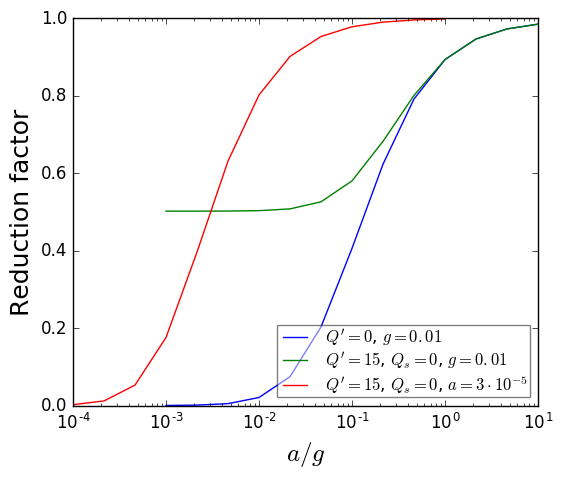

In [44]:
plt.figure()
for i in range(3):
    plt.semilogx(xvals[i,:],lebfacs[i,:],
        label = ['$Q^\prime=0$, $g=0.01$',r'$Q^\prime=15$, $Q_s=0$, $g=0.01$',r'$Q^\prime=15$, $Q_s=0$, $a=3 \cdot 10^{-5}$'][i])
plt.xlabel(r'$a/g$')
plt.legend(loc=0, framealpha=0.5, labelspacing=0.1, borderpad=0.1)
plt.ylabel('Reduction factor')

print(repr(xvals[2,:]))
print(repr(lebfacs[2,:]))
print(str(0.0200))

/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


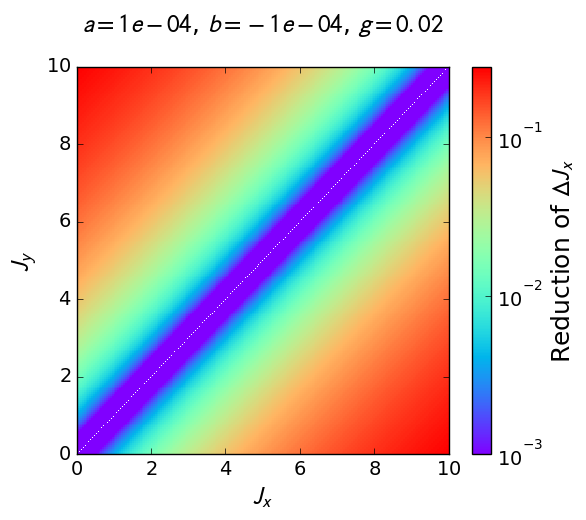

In [192]:
###################################################
a= 1e-4
b= -a
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,200)
jy = jx
JX,JY = np.meshgrid(jx,jy)



F = octu_leb(JX,JY,a,b,g)
vmin = np.min(F)
vmax = np.max(F) 
# vmax = 1.0
vmin = 10**(int(np.log10(vmax * 1e4)-7))
plt.figure()
plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
# plt.pcolor(JX,JY,F,vmin=vmin,vmax=vmax)
plt.colorbar(label=r'Reduction of $\Delta J_x$')
plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')
plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))

In [8]:
print(int(np.log10(0.2 * 1e4))-4)

-1


# Expected above to get a dependence like J_z^2
#### It does not behave as assumed
#### Must try with Qs = 0 ?

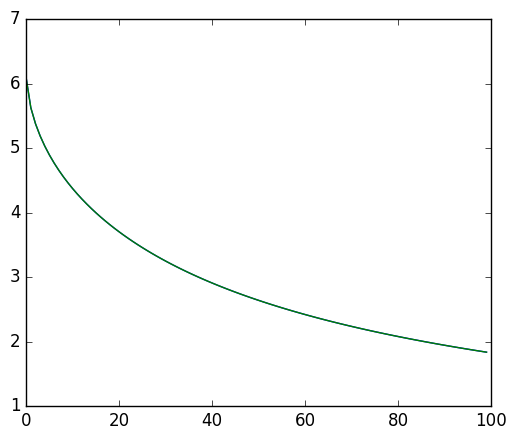

In [8]:
a = np.linspace(0.001,1,100)

f1 = 2*np.pi / (1+a+np.sqrt(a*(1+a)))
f2 = 2*(np.pi - a*np.pi/np.sqrt(a*(1+a)))
plt.plot(f1)
plt.plot(f2)

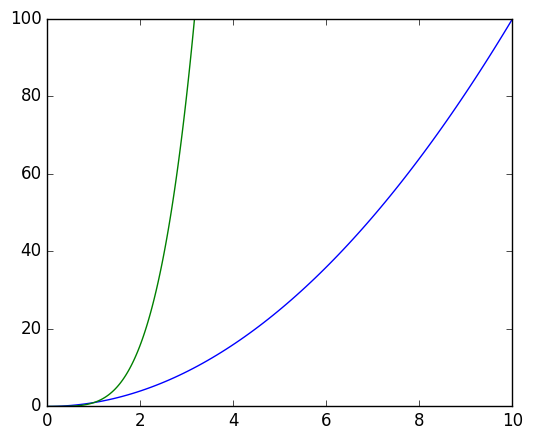

In [9]:
plt.figure()
plt.plot(Js,Js**2)
plt.plot(np.sqrt(Js),Js**2)

In [10]:
x = np.arange(10)
np.cumsum(x)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

# Why multiple steps

In [197]:
def psi(r,k,a,b,r0):
    x = (r-r0)/k
    arc = np.arccos(x)
    psi = np.zeros_like(r)
    
    psi[x<=1] = a
    psi[x>=1] = b
    psi[x**2<1] = 1/np.pi*(a-b)*arc[x**2<1] + b
    return psi

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


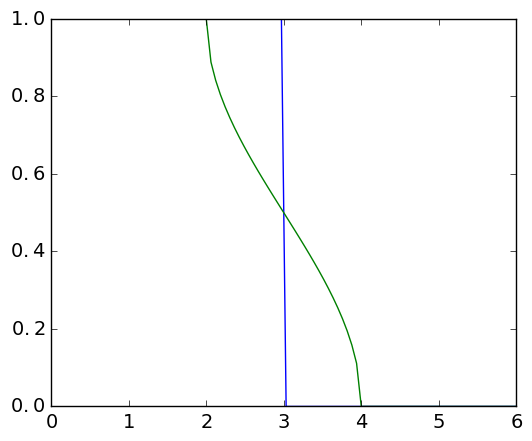

In [200]:
r = np.linspace(0,6,100)

plt.figure()
plt.plot(r,psi(r,0,1,0,3))
plt.plot(r,psi(r,1,1,0,3))

100000

/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


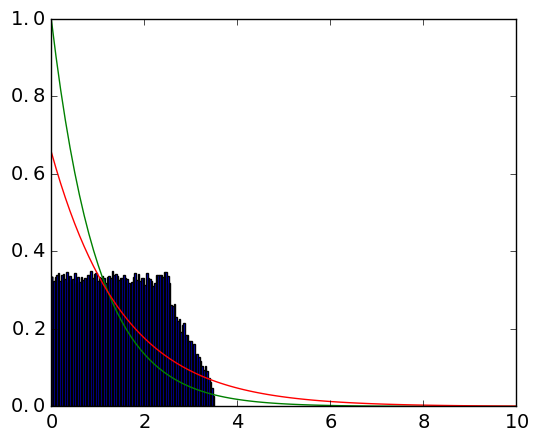

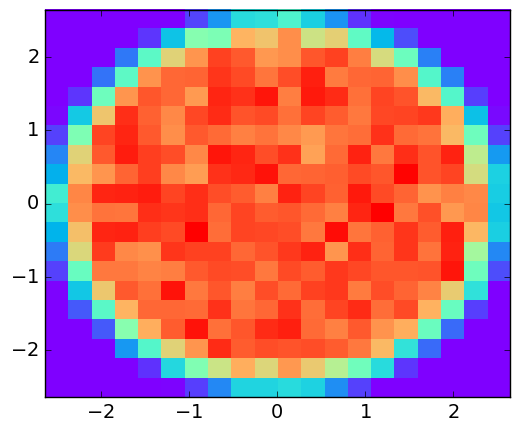

In [242]:
N=100000
Jl = np.linspace(0,10,100)
J = .5*np.random.chisquare(2,N)
J = np.random.uniform(0,3,N)
# J[:int(N/2)] = J[:int(N/2)]%1.5


phi = np.random.uniform(0,2*np.pi,N)
x = np.sqrt(2*J)*np.cos(phi)
p = np.sqrt(2*J)*np.sin(phi)

for i in range(1):
    p+=.2
    J=1/2*(x**2+p**2)
        
    phi = np.random.uniform(0,2*np.pi,N)
    x = np.sqrt(2*J)*np.cos(phi)
    p = np.sqrt(2*J)*np.sin(phi)

    

plt.figure()
plt.hist(J,bins=100,normed=True)
plt.plot(Jl,np.exp(-Jl))
plt.plot(Jl,1/np.mean(J)*np.exp(-Jl/np.mean(J)))
plt.figure()
plt.hist2d(x,p,bins=20,normed=True)
N

# expectation with many kicks

In [11]:
# http://www.dummies.com/education/math/business-statistics/how-to-calculate-the-variance-and-standard-deviation-in-the-uniform-distribution/

D = 5e-2
turns = 1000
sig = D/np.sqrt(3)
growth = turns*sig**2*0.5
print(growth)

0.416666666667


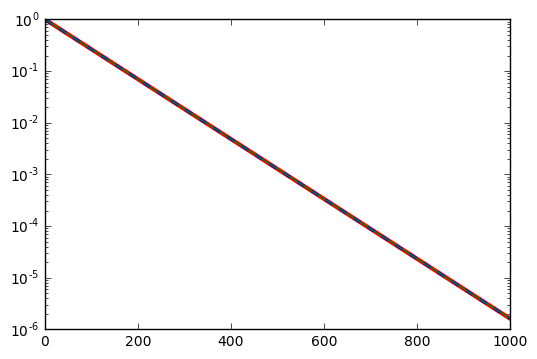

In [212]:
Nt = 100
tau1 = 100
tau2 = 300
tautot = (tau1+tau2)/(tau1*tau2)
t= np.linspace(0,1000,Nt)
x1 = 1*np.exp(-t/tau1)*np.exp(-t/tau2)
x2 = 1*np.exp(-t/tau1-t/tau2)
x3 = 1*np.exp(-t/tautot)
plt.figure()
plt.semilogy(t,x1,'r',lw =3)
plt.semilogy(t,x2,'b--',lw=2)
plt.semilogy(t,x2,'g',lw=1)

# New distribution

In [10]:
pi2= 2*np.pi
def dist(x,p,k):
    return 1/pi2 * np.exp(-x**2*0.5) * np.exp(-(p-k)**2*0.5)

def distJphi(phi,A,k):
    return dist(A*np.cos(phi),A*np.sin(phi),k)

/home/sfuruset/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: overflow encountered in exp


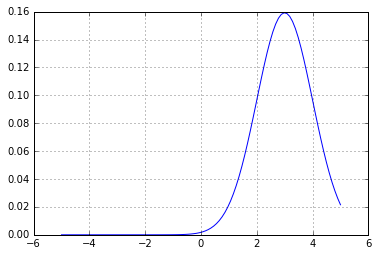

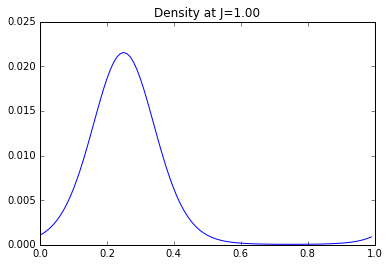

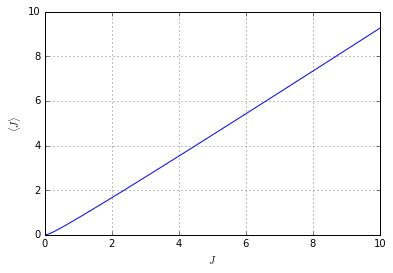

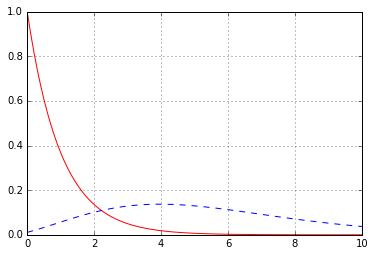

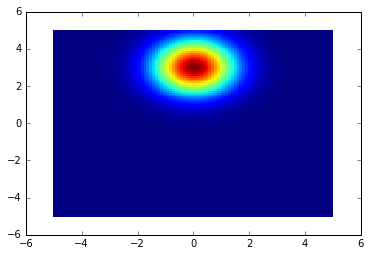

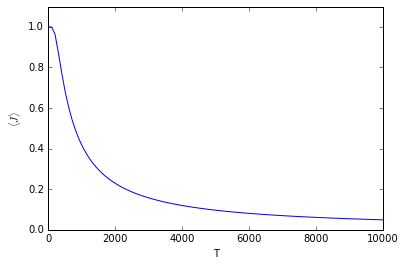

In [76]:
N=100
x = np.linspace(-5,5,N)
k=3

plt.figure()
plt.plot(x,dist(0,x,k))
plt.grid(True)

J = np.linspace(0,10,N)
A = np.sqrt(2*J)
phi = np.linspace(0,pi2,N,endpoint=False)
avgP = np.zeros_like(J)
distJ = np.zeros_like(J)


#########
plt.figure()
plt.plot(phi/pi2,distJphi(phi,1,k))
plt.title('Density at J=%.2f'%1)


########
for i in range(N):
#     avgJ[i] = integrate.quad(distJphi,0,pi2,args=(np.sqrt(2*J[i]),k))[0]
    distJ[i]= np.sum(distJphi(phi,A[i],k))/N*pi2
    avgP[i] = np.sum(A[i]*np.sin(phi)*distJphi(phi,A[i],k))/np.sum(distJphi(phi,np.sqrt(2*J[i]),k))
plt.figure()
plt.plot(J,0.5*(avgP**2))
plt.xlabel(r'$J$')
plt.ylabel(r'$\langle J \rangle$')
plt.grid(True)

plt.figure()
plt.plot(J,np.exp(-J),'r')
plt.plot(J,distJ,'b--')
plt.grid(True)


X,P = np.meshgrid(x,x)
plt.figure()
plt.pcolor(X,P,dist(X,P,k))

#########
a = 1e-3
T = np.linspace(1,10000,100)
r = 1/(T*a)
plt.figure()
plt.plot(T, 1-r/(np.exp(r)-1) )
plt.ylim(0,1.1)
plt.xlabel('T')   ; plt.ylabel(r'$\langle J \rangle$')
# plt.xlim(0,10)

# Model assumes small tune shifts, that remain fixed

In [59]:
Qp=10
sigdpp = 1.129e-4
dMU = np.arange(4)*2*np.pi*Qp*sigdpp

dMU = np.arange(6)*2*np.pi*1e-3
print('Chromaticity',dMU)
print('sin(dMU)',np.sin(dMU))
print('cos(dMU)',np.cos(dMU))

Chromaticity [ 0.          0.00628319  0.01256637  0.01884956  0.02513274  0.03141593]
sin(dMU) [ 0.          0.00628314  0.01256604  0.01884844  0.0251301   0.03141076]
cos(dMU) [ 1.          0.99998026  0.99992104  0.99982235  0.99968419  0.99950656]


# Reduction of damper efficiency due to chromaticity

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

(0, 10)

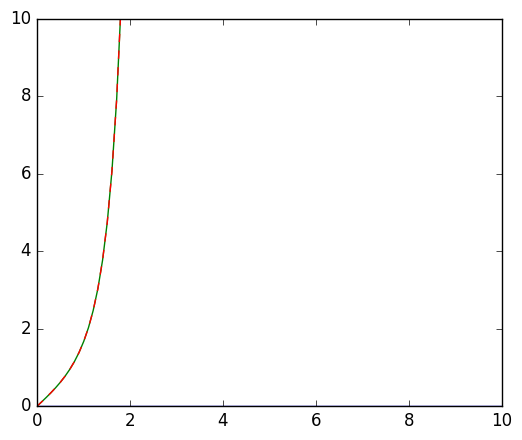

In [37]:
x = np.linspace(0,10,100)*1j
y = spec.erf(x)
y2 = spec.erfi(-1j*x)
print(x.imag,y.real)
print(y2)
plt.figure()
plt.plot(x.imag,np.real(y))
plt.plot(x.imag,np.imag(y))
plt.plot(x.imag,np.real(y2),'--')
plt.ylim(0,10)

In [1]:
t = np.linspace(0,1000,50)


sigd = 1e-4
Qp = 15
Qs = 0.002
g = 0.01

b = 1j*Qp/Qs/2*np.sqrt(1-np.cos(2*np.pi*Qs*t))
b = 1j*Qp/Qs/2*np.abs(np.sin(np.pi*Qs*t))*np.sqrt(2)
a = 1/(2*sigd**2)


def func(tt,sigd=1e-4,Qp=0,Qs=0.002):
#     b = 1j*Qp/Qs/2*np.sqrt(1-np.cos(2*np.pi*Qs*tt))
    b = 1j*Qp/Qs/2  *  np.abs(np.sin(np.pi*Qs*tt))*np.sqrt(2)
    a = 1/(2*sigd**2)
    c = b/np.sqrt(a)
    return np.real(np.sqrt(np.pi)*c*spec.erf(c)*np.exp(c**2))

def func_damp(tt,taut,sigd=1e-4,Qp=0,Qs=0.002):
    return func(tt,sigd,Qp,Qs)*np.exp(-tt/taut)

tauQp = -0.5/Qs*(func(.5/Qs,sigd,Qp,Qs))
print(tauQp)
taug = 2/g
# taut=taug* 1/taug/(1/taug + 1/tauQp)
taut = taug+tauQp
print(taut)
time = 1/Qs
# time = 3*taug
ans = integrate.quad(func_damp,0,time,args=(taut,sigd,Qp,Qs))[0]/time
ans = integrate.quad(func,0,time,args=(sigd,Qp,Qs))[0]/time
print(1+ans)

f  = 1+func(t,sigd=sigd,Qp=Qp,Qs=Qs)
f2 = np.exp(-t/taut)+func_damp(t,taut,sigd=sigd,Qp=Qp,Qs=Qs)

# pref=(Qp*sigd/Qs)**1/2
# g = 1+pref*(np.cos(2*np.pi*Qs*t)-1)


plt.figure()
plt.plot(t,f.real)
plt.plot(t,f2.real)
# plt.plot(t,g.real,'--')

NameError: name 'np' is not defined

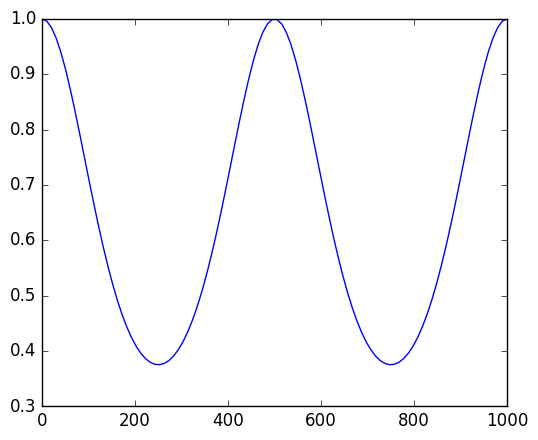

In [83]:
t = np.linspace(0,1000,100)
Qp = 14
sigd=1e-4
Qs = 0.002

f = np.exp(-(Qp*sigd/Qs*np.sin(np.pi*Qs*t))**2*2)

plt.figure()
plt.plot(t,f)